In [2]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00


In [25]:
# Nama: Ahmad Fahmi Abdillah
# NIM: 221011400489
# Kelas: 05TPLM006


Tingkat Kebahagiaan: 7.958333333333333


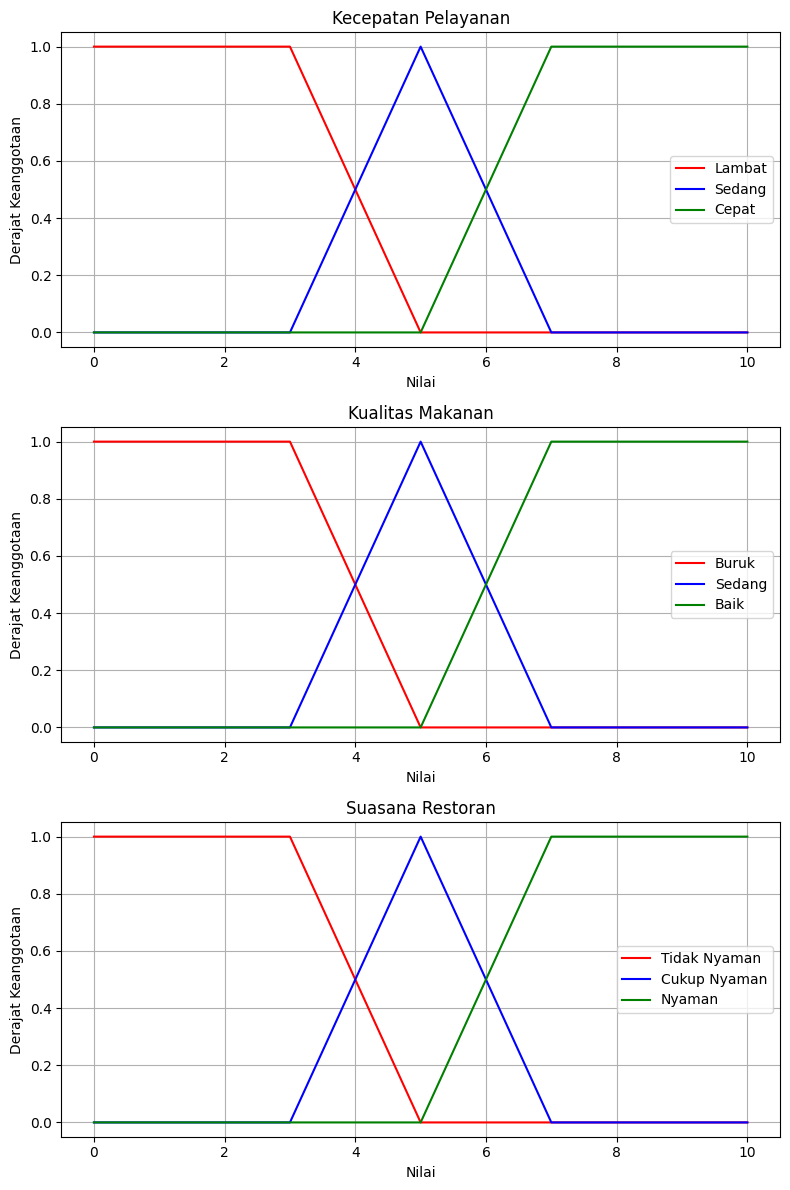

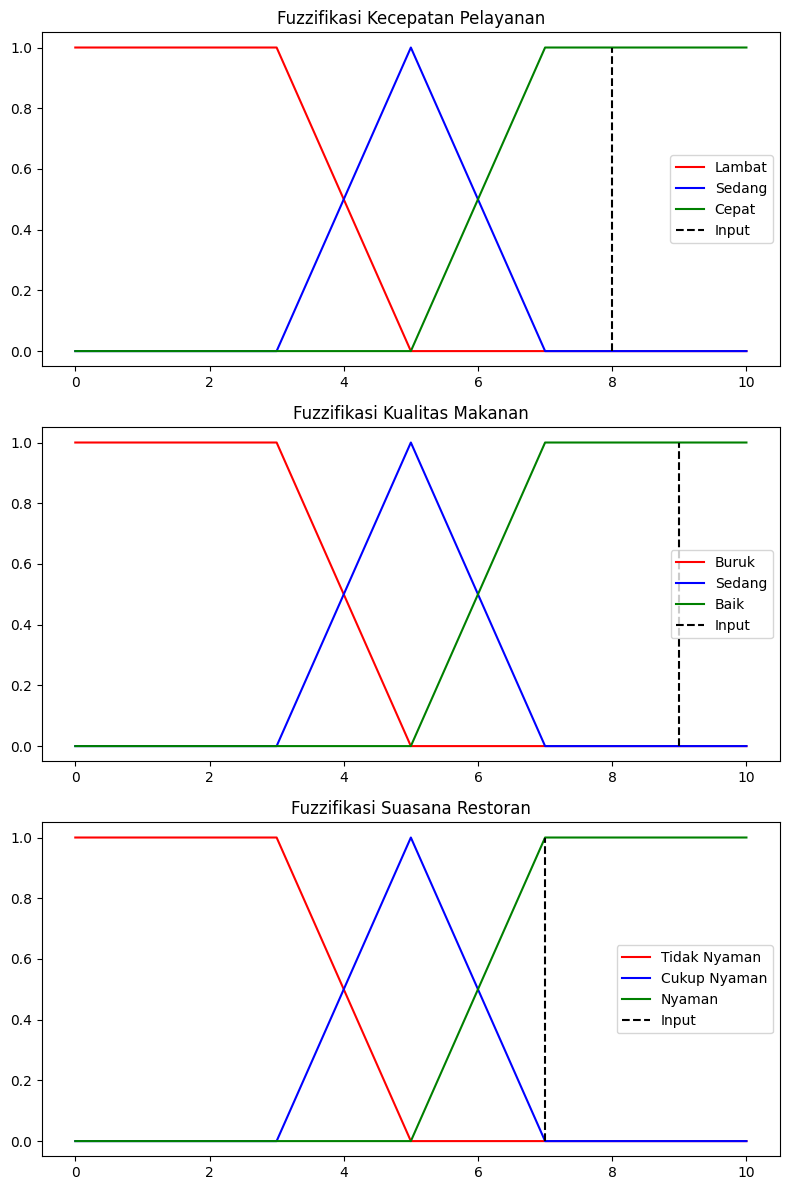

In [26]:

# Import libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
kecepatan_pelayanan = ctrl.Antecedent(np.arange(0, 11, 1), 'kecepatan_pelayanan')
kualitas_makanan = ctrl.Antecedent(np.arange(0, 11, 1), 'kualitas_makanan')
suasana_restoran = ctrl.Antecedent(np.arange(0, 11, 1), 'suasana_restoran')
tingkat_kebahagiaan = ctrl.Consequent(np.arange(0, 11, 1), 'tingkat_kebahagiaan')

# Define membership functions
kecepatan_pelayanan['lambat'] = fuzz.trapmf(kecepatan_pelayanan.universe, [0, 0, 3, 5])
kecepatan_pelayanan['sedang'] = fuzz.trimf(kecepatan_pelayanan.universe, [3, 5, 7])
kecepatan_pelayanan['cepat'] = fuzz.trapmf(kecepatan_pelayanan.universe, [5, 7, 10, 10])

kualitas_makanan['buruk'] = fuzz.trapmf(kualitas_makanan.universe, [0, 0, 3, 5])
kualitas_makanan['sedang'] = fuzz.trimf(kualitas_makanan.universe, [3, 5, 7])
kualitas_makanan['baik'] = fuzz.trapmf(kualitas_makanan.universe, [5, 7, 10, 10])

suasana_restoran['tidak_nyaman'] = fuzz.trapmf(suasana_restoran.universe, [0, 0, 3, 5])
suasana_restoran['cukup_nyaman'] = fuzz.trimf(suasana_restoran.universe, [3, 5, 7])
suasana_restoran['nyaman'] = fuzz.trapmf(suasana_restoran.universe, [5, 7, 10, 10])

tingkat_kebahagiaan['rendah'] = fuzz.trapmf(tingkat_kebahagiaan.universe, [0, 0, 3, 5])
tingkat_kebahagiaan['sedang'] = fuzz.trimf(tingkat_kebahagiaan.universe, [3, 5, 7])
tingkat_kebahagiaan['tinggi'] = fuzz.trapmf(tingkat_kebahagiaan.universe, [5, 7, 10, 10])

# Define rules
rule1 = ctrl.Rule(kecepatan_pelayanan['lambat'] | kualitas_makanan['buruk'] | suasana_restoran['tidak_nyaman'], tingkat_kebahagiaan['rendah'])
rule2 = ctrl.Rule(kecepatan_pelayanan['sedang'] & kualitas_makanan['sedang'] & suasana_restoran['cukup_nyaman'], tingkat_kebahagiaan['sedang'])
rule3 = ctrl.Rule(kecepatan_pelayanan['cepat'] & kualitas_makanan['baik'] & suasana_restoran['nyaman'], tingkat_kebahagiaan['tinggi'])

# Create control system
kebahagiaan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
kebahagiaan_simulasi = ctrl.ControlSystemSimulation(kebahagiaan_ctrl)

# Input values
kebahagiaan_simulasi.input['kecepatan_pelayanan'] = 8
kebahagiaan_simulasi.input['kualitas_makanan'] = 9
kebahagiaan_simulasi.input['suasana_restoran'] = 7

# Compute the result
kebahagiaan_simulasi.compute()

# Output
print(f"Tingkat Kebahagiaan: {kebahagiaan_simulasi.output['tingkat_kebahagiaan']}")

# Plotting membership functions
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Kecepatan Pelayanan
axs[0].plot(kecepatan_pelayanan.universe, fuzz.trapmf(kecepatan_pelayanan.universe, [0, 0, 3, 5]), label="Lambat", color="red")
axs[0].plot(kecepatan_pelayanan.universe, fuzz.trimf(kecepatan_pelayanan.universe, [3, 5, 7]), label="Sedang", color="blue")
axs[0].plot(kecepatan_pelayanan.universe, fuzz.trapmf(kecepatan_pelayanan.universe, [5, 7, 10, 10]), label="Cepat", color="green")
axs[0].set_title("Kecepatan Pelayanan")
axs[0].set_xlabel("Nilai")
axs[0].set_ylabel("Derajat Keanggotaan")
axs[0].legend()
axs[0].grid(True)

# Kualitas Makanan
axs[1].plot(kualitas_makanan.universe, fuzz.trapmf(kualitas_makanan.universe, [0, 0, 3, 5]), label="Buruk", color="red")
axs[1].plot(kualitas_makanan.universe, fuzz.trimf(kualitas_makanan.universe, [3, 5, 7]), label="Sedang", color="blue")
axs[1].plot(kualitas_makanan.universe, fuzz.trapmf(kualitas_makanan.universe, [5, 7, 10, 10]), label="Baik", color="green")
axs[1].set_title("Kualitas Makanan")
axs[1].set_xlabel("Nilai")
axs[1].set_ylabel("Derajat Keanggotaan")
axs[1].legend()
axs[1].grid(True)

# Suasana Restoran
axs[2].plot(suasana_restoran.universe, fuzz.trapmf(suasana_restoran.universe, [0, 0, 3, 5]), label="Tidak Nyaman", color="red")
axs[2].plot(suasana_restoran.universe, fuzz.trimf(suasana_restoran.universe, [3, 5, 7]), label="Cukup Nyaman", color="blue")
axs[2].plot(suasana_restoran.universe, fuzz.trapmf(suasana_restoran.universe, [5, 7, 10, 10]), label="Nyaman", color="green")
axs[2].set_title("Suasana Restoran")
axs[2].set_xlabel("Nilai")
axs[2].set_ylabel("Derajat Keanggotaan")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Visualize fuzzification process
input_values = {
    'kecepatan_pelayanan': 8,
    'kualitas_makanan': 9,
    'suasana_restoran': 7
}

fig_fuzz, axs_fuzz = plt.subplots(3, 1, figsize=(8, 12))

# Kecepatan Pelayanan Fuzzification
axs_fuzz[0].plot(kecepatan_pelayanan.universe, fuzz.trapmf(kecepatan_pelayanan.universe, [0, 0, 3, 5]), label="Lambat", color="red")
axs_fuzz[0].plot(kecepatan_pelayanan.universe, fuzz.trimf(kecepatan_pelayanan.universe, [3, 5, 7]), label="Sedang", color="blue")
axs_fuzz[0].plot(kecepatan_pelayanan.universe, fuzz.trapmf(kecepatan_pelayanan.universe, [5, 7, 10, 10]), label="Cepat", color="green")
fuzzified_kecepatan_lambat = fuzz.interp_membership(kecepatan_pelayanan.universe, fuzz.trapmf(kecepatan_pelayanan.universe, [0, 0, 3, 5]), input_values['kecepatan_pelayanan'])
fuzzified_kecepatan_sedang = fuzz.interp_membership(kecepatan_pelayanan.universe, fuzz.trimf(kecepatan_pelayanan.universe, [3, 5, 7]), input_values['kecepatan_pelayanan'])
fuzzified_kecepatan_cepat = fuzz.interp_membership(kecepatan_pelayanan.universe, fuzz.trapmf(kecepatan_pelayanan.universe, [5, 7, 10, 10]), input_values['kecepatan_pelayanan'])
axs_fuzz[0].vlines(input_values['kecepatan_pelayanan'], 0, max(fuzzified_kecepatan_lambat, fuzzified_kecepatan_sedang, fuzzified_kecepatan_cepat), color="black", linestyle="--", label="Input")
axs_fuzz[0].set_title("Fuzzifikasi Kecepatan Pelayanan")
axs_fuzz[0].legend()

# Kualitas Makanan Fuzzification
axs_fuzz[1].plot(kualitas_makanan.universe, fuzz.trapmf(kualitas_makanan.universe, [0, 0, 3, 5]), label="Buruk", color="red")
axs_fuzz[1].plot(kualitas_makanan.universe, fuzz.trimf(kualitas_makanan.universe, [3, 5, 7]), label="Sedang", color="blue")
axs_fuzz[1].plot(kualitas_makanan.universe, fuzz.trapmf(kualitas_makanan.universe, [5, 7, 10, 10]), label="Baik", color="green")
fuzzified_kualitas_buruk = fuzz.interp_membership(kualitas_makanan.universe, fuzz.trapmf(kualitas_makanan.universe, [0, 0, 3, 5]), input_values['kualitas_makanan'])
fuzzified_kualitas_sedang = fuzz.interp_membership(kualitas_makanan.universe, fuzz.trimf(kualitas_makanan.universe, [3, 5, 7]), input_values['kualitas_makanan'])
fuzzified_kualitas_baik = fuzz.interp_membership(kualitas_makanan.universe, fuzz.trapmf(kualitas_makanan.universe, [5, 7, 10, 10]), input_values['kualitas_makanan'])
axs_fuzz[1].vlines(input_values['kualitas_makanan'], 0, max(fuzzified_kualitas_buruk, fuzzified_kualitas_sedang, fuzzified_kualitas_baik), color="black", linestyle="--", label="Input")
axs_fuzz[1].set_title("Fuzzifikasi Kualitas Makanan")
axs_fuzz[1].legend()

# Suasana Restoran Fuzzification
axs_fuzz[2].plot(suasana_restoran.universe, fuzz.trapmf(suasana_restoran.universe, [0, 0, 3, 5]), label="Tidak Nyaman", color="red")
axs_fuzz[2].plot(suasana_restoran.universe, fuzz.trimf(suasana_restoran.universe, [3, 5, 7]), label="Cukup Nyaman", color="blue")
axs_fuzz[2].plot(suasana_restoran.universe, fuzz.trapmf(suasana_restoran.universe, [5, 7, 10, 10]), label="Nyaman", color="green")
fuzzified_suasana_tidak_nyaman = fuzz.interp_membership(suasana_restoran.universe, fuzz.trapmf(suasana_restoran.universe, [0, 0, 3, 5]), input_values['suasana_restoran'])
fuzzified_suasana_cukup_nyaman = fuzz.interp_membership(suasana_restoran.universe, fuzz.trimf(suasana_restoran.universe, [3, 5, 7]), input_values['suasana_restoran'])
fuzzified_suasana_nyaman = fuzz.interp_membership(suasana_restoran.universe, fuzz.trapmf(suasana_restoran.universe, [5, 7, 10, 10]), input_values['suasana_restoran'])
axs_fuzz[2].vlines(input_values['suasana_restoran'], 0, max(fuzzified_suasana_tidak_nyaman, fuzzified_suasana_cukup_nyaman, fuzzified_suasana_nyaman), color="black", linestyle="--", label="Input")
axs_fuzz[2].set_title("Fuzzifikasi Suasana Restoran")
axs_fuzz[2].legend()

plt.tight_layout()
plt.show()
